In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import ast

In [2]:
def label_encode(df_column):
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df_column)
    return encoded_column

In [3]:
def get_column_info(df_column):
    print('Value Count: ')
    print(df_column.value_counts())
    print('Number of missing values ', df_column.isnull().sum())

In [4]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [5]:
df = pd.read_csv('./yelp_dataset/resturants_feature.csv')

/Users/TinyJiew/opt/anaconda3/envs/learnPython/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,business_id,name,city,state,stars,review_count,is_open,Cursine,BusinessAcceptsBitcoin,OutdoorSeating,...,DietaryRestrictions,RestaurantsPriceRange2,NoiseLevel,DriveThru,AcceptsInsurance,ByAppointmentOnly,RestaurantsAttire,Music,open_weekend,open_count
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,Champaign,IL,4.5,5,1,Argentine,NaN,False,...,NaN,1,u'quiet',NaN,NaN,False,u'casual',NaN,False,244
1,-LfTBo0oa_uD454ScEW2XA,Merry Ann's Diner,Champaign,IL,3.0,47,0,American (Traditional),NaN,False,...,NaN,1,u'loud',NaN,NaN,NaN,'casual',NaN,True,244
2,Z7r_FJXEyfyvVsyv2y7gFQ,Cactus Grill,Champaign,IL,4.0,60,1,Mexican,NaN,False,...,NaN,1,u'average',NaN,NaN,NaN,u'casual',NaN,True,244
3,VHsNB3pdGVcRgs6C3jt6Zg,Dublin O'Neil's,Champaign,IL,3.5,130,0,Irish,NaN,True,...,NaN,2,u'average',NaN,NaN,NaN,u'casual',NaN,True,244
4,ZMcbVIEXsLO7j1Q1GXKPSw,A-Ri-Rang,Champaign,IL,4.0,60,1,Korean,NaN,False,...,NaN,1,u'average',NaN,NaN,NaN,'casual',NaN,True,244


In [7]:
df.shape

(31839, 49)

In [8]:
df.columns

Index(['business_id', 'name', 'city', 'state', 'stars', 'review_count',
       'is_open', 'Cursine', 'BusinessAcceptsBitcoin', 'OutdoorSeating',
       'GoodForMeal', 'Smoking', 'BYOBCorkage', 'BikeParking', 'WiFi',
       'BusinessParking', 'BestNights', 'Ambience', 'Caters', 'GoodForDancing',
       'RestaurantsGoodForGroups', 'Open24Hours', 'Alcohol',
       'RestaurantsTableService', 'BYOB', 'AgesAllowed', 'HasTV',
       'RestaurantsTakeOut', 'DogsAllowed', 'HappyHour',
       'RestaurantsReservations', 'BusinessAcceptsCreditCards',
       'RestaurantsCounterService', 'RestaurantsDelivery', 'Corkage',
       'HairSpecializesIn', 'CoatCheck', 'WheelchairAccessible', 'GoodForKids',
       'DietaryRestrictions', 'RestaurantsPriceRange2', 'NoiseLevel',
       'DriveThru', 'AcceptsInsurance', 'ByAppointmentOnly',
       'RestaurantsAttire', 'Music', 'open_weekend', 'open_count'],
      dtype='object')

In [9]:
#hist plot how many resturants by review star
df.stars.value_counts()

4.0    8839
3.5    8282
3.0    5561
4.5    4199
2.5    2674
2.0    1226
5.0     625
1.5     333
1.0     100
Name: stars, dtype: int64

<AxesSubplot:>

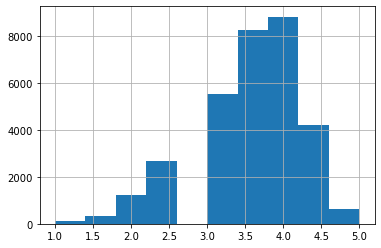

In [10]:
df.stars.hist()

In [11]:
#There are 555 cities
df.city.value_counts()

Toronto            4328
Las Vegas          3760
Phoenix            2129
Montréal           1890
Charlotte          1507
                   ... 
Sturgeon              1
Mooers                1
Iberville             1
Peters Township       1
Sheboygan             1
Name: city, Length: 555, dtype: int64

In [12]:
df.state.value_counts()

ON    8160
AZ    6368
NV    4482
OH    2763
QC    2705
NC    2350
PA    2041
AB    1526
WI     915
IL     320
SC     192
NY       5
TX       3
CO       2
FL       1
MB       1
OR       1
CA       1
VA       1
VT       1
HI       1
Name: state, dtype: int64

# Feature Analysis

In [13]:
get_column_info(df.HairSpecializesIn)

Value Count: 
{'straightperms': True, 'coloring': True, 'extensions': True, 'africanamerican': True, 'curly': True, 'kids': True, 'perms': True, 'asian': True}    1
Name: HairSpecializesIn, dtype: int64
Number of missing values  31838


In [14]:
#drop the row and column
df[df.HairSpecializesIn.notnull()]

,business_id,name,city,state,stars,review_count,is_open,Cursine,BusinessAcceptsBitcoin,OutdoorSeating,...,DietaryRestrictions,RestaurantsPriceRange2,NoiseLevel,DriveThru,AcceptsInsurance,ByAppointmentOnly,RestaurantsAttire,Music,open_weekend,open_count
6621,8d8Q3ZhAJwzdfxdj-mFmqQ,Naty Dominican Hair Stylist,Charlotte,NC,4.0,25,1,Dominican,NaN,NaN,...,NaN,1,NaN,NaN,NaN,False,NaN,NaN,True,1788


In [15]:
df = df.drop(1134)

In [16]:
df.drop('HairSpecializesIn', axis=1, inplace=True)
df.shape

(31838, 48)

In [17]:
get_column_info(df.AcceptsInsurance)

Value Count: 
True     3
False    1
Name: AcceptsInsurance, dtype: int64
Number of missing values  31834


In [18]:
#drop the row with True
df[df.AcceptsInsurance == True]

,business_id,name,city,state,stars,review_count,is_open,Cursine,BusinessAcceptsBitcoin,OutdoorSeating,...,DietaryRestrictions,RestaurantsPriceRange2,NoiseLevel,DriveThru,AcceptsInsurance,ByAppointmentOnly,RestaurantsAttire,Music,open_weekend,open_count
6290,I3Saf0s5ybDKprYPPNWqtA,Urbana Spa,Charlotte,NC,4.0,86,1,American (New),NaN,False,...,NaN,3,u'quiet',NaN,True,True,NaN,NaN,True,1788
9791,wqmyI0jPBAhcUcdNKr-09A,Spa My Blends by Clarins,Toronto,ON,4.5,34,1,British,NaN,NaN,...,NaN,3,u'quiet',NaN,True,True,NaN,NaN,True,4385
16940,KlLCJN_KUP9xFQBJYrhgVg,Phoenix Children’s Hospital,Phoenix,AZ,3.0,195,1,Mediterranean,NaN,False,...,NaN,2,u'average',NaN,True,False,u'casual',NaN,True,2420


In [19]:
#extra HairSpecializesIn, AcceptsInsurance
df = df.drop([6290, 9791, 16940])

In [20]:
df.drop('AcceptsInsurance', axis=1, inplace=True)
df.shape

(31835, 47)

In [21]:
get_column_info(df.RestaurantsCounterService)

Value Count: 
True     7
False    3
Name: RestaurantsCounterService, dtype: int64
Number of missing values  31825


In [22]:
get_column_info(df.RestaurantsDelivery)

Value Count: 
False    17249
True     11242
None       461
Name: RestaurantsDelivery, dtype: int64
Number of missing values  2883


In [23]:
#Change none and null value to False
df.RestaurantsDelivery.fillna('False', inplace = True)
df.loc[df.RestaurantsDelivery == 'None', 'RestaurantsDelivery'] = 'False'
get_column_info(df.RestaurantsDelivery)

Value Count: 
False    20593
True     11242
Name: RestaurantsDelivery, dtype: int64
Number of missing values  0


In [24]:
#change to labelencoder
df.RestaurantsDelivery = label_encode(df.RestaurantsDelivery)
get_column_info(df.RestaurantsDelivery)

Value Count: 
0    20593
1    11242
Name: RestaurantsDelivery, dtype: int64
Number of missing values  0


In [25]:
get_column_info(df.AgesAllowed)

Value Count: 
u'21plus'     15
u'allages'     6
u'19plus'      2
u'18plus'      1
Name: AgesAllowed, dtype: int64
Number of missing values  31811


In [26]:
#assume that if it doesnot specifiy - means that all ages can enter
#however, let remove first character u from all values
df.AgesAllowed = df.AgesAllowed.str[1:]
df.AgesAllowed.fillna('allages', inplace = True)

get_column_info(df.AgesAllowed)

Value Count: 
allages      31811
'21plus'        15
'allages'        6
'19plus'         2
'18plus'         1
Name: AgesAllowed, dtype: int64
Number of missing values  0


In [27]:
df.AgesAllowed = label_encode(df.AgesAllowed)
get_column_info(df.AgesAllowed)

Value Count: 
4    31811
2       15
3        6
1        2
0        1
Name: AgesAllowed, dtype: int64
Number of missing values  0


In [28]:
get_column_info(df.RestaurantsGoodForGroups)

Value Count: 
True     25656
False     2787
None        15
Name: RestaurantsGoodForGroups, dtype: int64
Number of missing values  3377


In [29]:
df.RestaurantsGoodForGroups.fillna('True', inplace = True)
df.loc[df.RestaurantsGoodForGroups == 'None', 'RestaurantsGoodForGroups'] = 'True'

In [30]:
df.RestaurantsGoodForGroups = label_encode(df.RestaurantsGoodForGroups)
get_column_info(df.RestaurantsGoodForGroups)

Value Count: 
1    29048
0     2787
Name: RestaurantsGoodForGroups, dtype: int64
Number of missing values  0


In [31]:
get_column_info(df.WheelchairAccessible)

Value Count: 
True     6649
False    1007
None        8
Name: WheelchairAccessible, dtype: int64
Number of missing values  24171


In [32]:
#assume that they're not  suiable for wheelchair
df.WheelchairAccessible.fillna('True', inplace = True)
df.loc[df.WheelchairAccessible == 'None', 'WheelchairAccessible'] = 'True'
get_column_info(df.WheelchairAccessible)

Value Count: 
True     30828
False     1007
Name: WheelchairAccessible, dtype: int64
Number of missing values  0


In [33]:
df.WheelchairAccessible = label_encode(df.WheelchairAccessible)
get_column_info(df.WheelchairAccessible)

Value Count: 
1    30828
0     1007
Name: WheelchairAccessible, dtype: int64
Number of missing values  0


In [34]:
get_column_info(df.RestaurantsPriceRange2)

Value Count: 
2       17321
1        9021
3        1746
4         267
None       18
Name: RestaurantsPriceRange2, dtype: int64
Number of missing values  3462


In [35]:
#some resturants may not specifiy the price ranges or have missing value
#we have no information about which range means high price or low price
#let see the resturants with 4 price range
#after quick searching on google we can assume that 4 means higher price
df[df.RestaurantsPriceRange2 == '4']

,business_id,name,city,state,stars,review_count,is_open,Cursine,BusinessAcceptsBitcoin,OutdoorSeating,...,GoodForKids,DietaryRestrictions,RestaurantsPriceRange2,NoiseLevel,DriveThru,ByAppointmentOnly,RestaurantsAttire,Music,open_weekend,open_count
248,J5go9hqKOmPy3Y14LizGYQ,Kohinoor Kabob House,Richmond Hill,ON,2.5,6,1,Pakistani,NaN,False,...,True,NaN,4,u'average',NaN,NaN,'casual',NaN,True,296
261,h8zFBTYBKSwDFcHuFgwpmQ,Day & Night Angus Beef Hot Pot,Richmond Hill,ON,3.5,42,0,Chinese,NaN,False,...,True,NaN,4,u'average',NaN,NaN,'casual',NaN,True,296
459,tZtKBCfUJaS7l79fuK1Ozw,Captain S,Richmond Hill,ON,3.0,5,0,Japanese,NaN,NaN,...,True,NaN,4,NaN,NaN,NaN,'casual',NaN,True,296
472,nFcS1gSkaAPSJB8jXZXlOw,Crab Harbour,Richmond Hill,ON,3.5,32,0,Canadian (New),NaN,False,...,True,NaN,4,u'quiet',NaN,NaN,'casual',NaN,True,296
1197,VQGetWNN1f0dMWQ6ehDAVg,Morton's The Steakhouse,Cleveland,OH,3.5,108,1,American (Traditional),NaN,False,...,False,NaN,4,u'average',NaN,NaN,'dressy',"{'dj': False, 'background_music': False, 'no_m...",True,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31353,7FNxzsZp3cUnxbxXFmZslQ,Barking Shark Bar & Grill,Millvale,PA,3.0,5,1,American (Traditional),NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,True,8
31408,t_1myTZfYeEQ07Jr8JEF5Q,Cabane à Sucre Au Pied de Cochon,Mirabel,QC,4.0,80,1,French,NaN,False,...,True,NaN,4,u'loud',NaN,NaN,u'casual',NaN,True,1
31604,yCa7CSRK65U_ZtzRB3XtGw,Cru Uncorked,Moreland Hills,OH,4.5,38,1,American (New),NaN,True,...,False,NaN,4,u'quiet',NaN,NaN,u'formal',"{'dj': False, 'background_music': False, 'no_m...",True,4
31650,MgnC3c3IByQkOJ0vyBKfUA,Stage West Theatre Restaurants,Calgary,MB,4.0,34,1,Canadian (New),NaN,False,...,True,NaN,4,u'average',NaN,NaN,'dressy',NaN,True,1


In [36]:
# there are 3462 resturants with missing values
# drop these rows
df = df.dropna(axis=0, subset=['RestaurantsPriceRange2'])
df = df[df.RestaurantsPriceRange2 != 'None']
get_column_info(df.RestaurantsPriceRange2)

Value Count: 
2    17321
1     9021
3     1746
4      267
Name: RestaurantsPriceRange2, dtype: int64
Number of missing values  0


In [37]:
get_column_info(df.BusinessAcceptsBitcoin)

Value Count: 
False    2735
True       31
Name: BusinessAcceptsBitcoin, dtype: int64
Number of missing values  25589


In [38]:
#There are only 31 of them accept Bitcoin for payment
#there are lots of missing value - assume that they do not accept bitcoin payment
df.BusinessAcceptsBitcoin.fillna(False, inplace = True)
get_column_info(df.BusinessAcceptsBitcoin)

Value Count: 
False    28324
True        31
Name: BusinessAcceptsBitcoin, dtype: int64
Number of missing values  0


In [39]:
df.BusinessAcceptsBitcoin = label_encode(df.BusinessAcceptsBitcoin)
get_column_info(df.BusinessAcceptsBitcoin)

Value Count: 
0    28324
1       31
Name: BusinessAcceptsBitcoin, dtype: int64
Number of missing values  0


In [40]:
get_column_info(df.Open24Hours)

Value Count: 
False    5
True     2
Name: Open24Hours, dtype: int64
Number of missing values  28348


In [41]:
#all of them does not open for 24 hours so this can be dropped
df.drop('Open24Hours', axis=1, inplace=True)
df.shape

(28355, 46)

In [42]:
get_column_info(df.RestaurantsCounterService)

Value Count: 
True     7
False    3
Name: RestaurantsCounterService, dtype: int64
Number of missing values  28345


In [43]:
#no significant difference of this value - can be dropped
df.drop('RestaurantsCounterService', axis=1, inplace=True)
df.shape

(28355, 45)

In [44]:
get_column_info(df.HappyHour)

Value Count: 
True     6040
False    2734
None        2
Name: HappyHour, dtype: int64
Number of missing values  19579


In [45]:
#assigned to false 
df.loc[df.HappyHour == 'None', 'HappyHour'] = 'False'
df.HappyHour.fillna('False', inplace = True)
get_column_info(df.HappyHour)

Value Count: 
False    22315
True      6040
Name: HappyHour, dtype: int64
Number of missing values  0


In [46]:
df.HappyHour = label_encode(df.HappyHour)
get_column_info(df.HappyHour)

Value Count: 
0    22315
1     6040
Name: HappyHour, dtype: int64
Number of missing values  0


In [47]:
get_column_info(df.WiFi)

Value Count: 
u'free'    8483
u'no'      7841
'no'       4042
'free'     3599
u'paid'      98
'paid'       48
None         31
Name: WiFi, dtype: int64
Number of missing values  4213


In [48]:
#assume that missing and None have no wifi
df.loc[df.WiFi == 'None', 'WiFi'] = 'no'
df.WiFi.fillna('no', inplace = True)
get_column_info(df.WiFi)

Value Count: 
u'free'    8483
u'no'      7841
no         4244
'no'       4042
'free'     3599
u'paid'      98
'paid'       48
Name: WiFi, dtype: int64
Number of missing values  0


In [49]:
#remove 'u'
df.WiFi = np.where(df['WiFi'].str.contains("u"), df.WiFi.str[1:], df.WiFi)
get_column_info(df.WiFi)

Value Count: 
'free'    12082
'no'      11883
no         4244
'paid'      146
Name: WiFi, dtype: int64
Number of missing values  0


In [50]:
#remove single quote
df.WiFi = df.WiFi.str.replace("'","")
get_column_info(df.WiFi)

Value Count: 
no      16127
free    12082
paid      146
Name: WiFi, dtype: int64
Number of missing values  0


In [51]:
df.WiFi = label_encode(df.WiFi)
get_column_info(df.WiFi)

Value Count: 
1    16127
0    12082
2      146
Name: WiFi, dtype: int64
Number of missing values  0


In [52]:
get_column_info(df.GoodForKids)

Value Count: 
True     22350
False     4713
None        10
Name: GoodForKids, dtype: int64
Number of missing values  1282


In [53]:
#assigned to True 
df.loc[df.GoodForKids == 'None', 'GoodForKids'] = 'True'
df.GoodForKids.fillna('True', inplace = True)
get_column_info(df.GoodForKids)

Value Count: 
True     23642
False     4713
Name: GoodForKids, dtype: int64
Number of missing values  0


In [54]:
df.GoodForKids = label_encode(df.GoodForKids)
get_column_info(df.GoodForKids)

Value Count: 
1    23642
0     4713
Name: GoodForKids, dtype: int64
Number of missing values  0


In [55]:
get_column_info(df.GoodForDancing)

Value Count: 
False    1376
False    1277
True      204
True      138
None        1
Name: GoodForDancing, dtype: int64
Number of missing values  25359


In [56]:
#change str to bool
df.loc[df.GoodForDancing == 'False', 'GoodForDancing'] = False
df.loc[df.GoodForDancing == 'True', 'GoodForDancing'] = True

#assigned to false 
df.loc[df.GoodForDancing == 'None', 'GoodForDancing'] = False
df.GoodForDancing.fillna(False, inplace = True)
get_column_info(df.GoodForDancing)

Value Count: 
False    28013
True       342
Name: GoodForDancing, dtype: int64
Number of missing values  0


In [57]:
df.GoodForDancing = label_encode(df.GoodForDancing)
get_column_info(df.GoodForDancing)

Value Count: 
0    28013
1      342
Name: GoodForDancing, dtype: int64
Number of missing values  0


In [58]:
get_column_info(df.OutdoorSeating)

Value Count: 
False    15443
True     11490
None        20
Name: OutdoorSeating, dtype: int64
Number of missing values  1402


In [59]:
#assigned to false 
df.loc[df.OutdoorSeating == 'None', 'OutdoorSeating'] = 'False'
df.OutdoorSeating.fillna('False', inplace = True)
get_column_info(df.OutdoorSeating)

Value Count: 
False    16865
True     11490
Name: OutdoorSeating, dtype: int64
Number of missing values  0


In [60]:
df.OutdoorSeating = label_encode(df.OutdoorSeating)
get_column_info(df.OutdoorSeating)

Value Count: 
0    16865
1    11490
Name: OutdoorSeating, dtype: int64
Number of missing values  0


In [61]:
get_column_info(df.NoiseLevel)

Value Count: 
u'average'      13919
u'quiet'         4133
'average'        3225
u'loud'          1541
'quiet'           777
u'very_loud'      516
'loud'            265
'very_loud'        51
None               23
Name: NoiseLevel, dtype: int64
Number of missing values  3905


In [62]:
#remove u
df.NoiseLevel = np.where(df['NoiseLevel'].str.contains("u"), df.NoiseLevel.str[1:], df.NoiseLevel)
get_column_info(df.NoiseLevel)

Value Count: 
'average'      17144
'quiet'         4133
'loud'          1541
quiet'           777
'very_loud'      516
loud'            265
very_loud'        51
None              23
Name: NoiseLevel, dtype: int64
Number of missing values  3905


In [63]:
#assign missing value to average noise level
df.loc[df.NoiseLevel == 'None', 'NoiseLevel'] = 'average'
df.NoiseLevel.fillna('average', inplace = True)
get_column_info(df.NoiseLevel)

Value Count: 
'average'      17144
'quiet'         4133
average         3928
'loud'          1541
quiet'           777
'very_loud'      516
loud'            265
very_loud'        51
Name: NoiseLevel, dtype: int64
Number of missing values  0


In [64]:
#remove single quote
df.NoiseLevel = df.NoiseLevel.str.replace("'","")
get_column_info(df.NoiseLevel)

Value Count: 
average      21072
quiet         4910
loud          1806
very_loud      567
Name: NoiseLevel, dtype: int64
Number of missing values  0


In [65]:
df.NoiseLevel = label_encode(df.NoiseLevel)
get_column_info(df.NoiseLevel)

Value Count: 
0    21072
2     4910
1     1806
3      567
Name: NoiseLevel, dtype: int64
Number of missing values  0


In [66]:
#need extra work on this
get_column_info(df.DietaryRestrictions)

Value Count: 
{'dairy-free': False, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    6
None                                                                                                                                   6
{'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}    4
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    3
{'dairy-free': False, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}     3
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}     2
{'dairy-free': True, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}      1
{'dairy-free': False, 'glut

In [67]:
get_column_info(df.BusinessAcceptsCreditCards)

Value Count: 
True     18068
False      293
None         9
Name: BusinessAcceptsCreditCards, dtype: int64
Number of missing values  9985


In [68]:
#assign missing value to True
df.loc[df.BusinessAcceptsCreditCards == 'None', 'BusinessAcceptsCreditCards'] = 'True'
df.BusinessAcceptsCreditCards.fillna('True', inplace = True)
get_column_info(df.BusinessAcceptsCreditCards)

Value Count: 
True     28062
False      293
Name: BusinessAcceptsCreditCards, dtype: int64
Number of missing values  0


In [69]:
df.BusinessAcceptsCreditCards = label_encode(df.BusinessAcceptsCreditCards)
get_column_info(df.BusinessAcceptsCreditCards)

Value Count: 
1    28062
0      293
Name: BusinessAcceptsCreditCards, dtype: int64
Number of missing values  0


In [70]:
get_column_info(df.BYOB)

Value Count: 
False    280
True      44
Name: BYOB, dtype: int64
Number of missing values  28031


In [71]:
#doesn't give significant values - dorp column
df.drop('BYOB', axis=1, inplace=True)
df.shape

(28355, 44)

In [72]:
#need to work on
get_column_info(df.BestNights)

Value Count: 
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': True, 'sunday': False, 'saturday': True}       501
{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}    480
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': True}       295
{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}     196
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}      170
                                                                                                                                  ... 
{'monday': False, 'tuesday': True, 'friday': False, 'wednesday': True, 'thursday': False, 'sunday': False, 'saturday': False}        4
{'monday': True, 'tuesday': False, 'frida

In [73]:
get_column_info(df.RestaurantsTableService)

Value Count: 
True     9255
False    3315
None       11
Name: RestaurantsTableService, dtype: int64
Number of missing values  15774


In [74]:
#assign missing value to False
df.loc[df.RestaurantsTableService == 'None', 'RestaurantsTableService'] = 'False'
df.RestaurantsTableService.fillna('False', inplace = True)
get_column_info(df.RestaurantsTableService)

Value Count: 
False    19100
True      9255
Name: RestaurantsTableService, dtype: int64
Number of missing values  0


In [75]:
df.RestaurantsTableService = label_encode(df.RestaurantsTableService)
get_column_info(df.RestaurantsTableService)

Value Count: 
0    19100
1     9255
Name: RestaurantsTableService, dtype: int64
Number of missing values  0


In [76]:
get_column_info(df.Alcohol)

Value Count: 
u'full_bar'         10061
u'none'              6851
u'beer_and_wine'     2980
'none'               2475
'full_bar'           1958
'beer_and_wine'      1100
None                   22
Name: Alcohol, dtype: int64
Number of missing values  2908


In [77]:
#assign missing value to none
df.loc[df.Alcohol == 'None', 'Alcohol'] = 'none'
df.Alcohol.fillna('none', inplace = True)
get_column_info(df.Alcohol)

Value Count: 
u'full_bar'         10061
u'none'              6851
u'beer_and_wine'     2980
none                 2930
'none'               2475
'full_bar'           1958
'beer_and_wine'      1100
Name: Alcohol, dtype: int64
Number of missing values  0


In [78]:
# remove u and single quote

df.Alcohol = np.where(df['Alcohol'].str.contains("u"), df.Alcohol.str[1:], df.Alcohol)
df.Alcohol = df.Alcohol.str.replace("'","")
get_column_info(df.Alcohol)

Value Count: 
none             12256
full_bar         12019
beer_and_wine     4080
Name: Alcohol, dtype: int64
Number of missing values  0


In [79]:
df.Alcohol = label_encode(df.Alcohol)
get_column_info(df.Alcohol)

Value Count: 
2    12256
1    12019
0     4080
Name: Alcohol, dtype: int64
Number of missing values  0


In [80]:
#need to work on 
get_column_info(df.BusinessParking)

Value Count: 
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     11393
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}     6491
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}      4327
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}       1143
{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}       511
                                                                                        ...  
{'garage': None, 'street': True, 'validated': False, 'lot': True, 'valet': False}           1
{'garage': None, 'street': None, 'validated': True, 'lot': True, 'valet': False}            1
{'garage': True, 'street': None, 'validated': None, 'lot': True, 'valet': False}            1
{'garage': False, 'validated': False, 'street': False, 'lot': False, 'valet': False}        1
{'garage': True, 'street': False, 'validated':

In [81]:
get_column_info(df.Smoking)

Value Count: 
u'no'         1237
u'outdoor'     788
u'yes'         123
'no'            10
None             3
'outdoor'        2
Name: Smoking, dtype: int64
Number of missing values  26192


In [82]:
#assign missing value to no
df.loc[df.Smoking == 'None', 'Smoking'] = 'no'
df.Smoking.fillna('no', inplace = True)
get_column_info(df.Smoking)

Value Count: 
no            26195
u'no'          1237
u'outdoor'      788
u'yes'          123
'no'             10
'outdoor'         2
Name: Smoking, dtype: int64
Number of missing values  0


In [83]:
# remove u and single quote

df.Smoking = np.where(df['Smoking'].str.contains("u"), df.Smoking.str[1:], df.Smoking)
df.Smoking = df.Smoking.str.replace("'","")
get_column_info(df.Smoking)

Value Count: 
no         27442
outdoor      790
yes          123
Name: Smoking, dtype: int64
Number of missing values  0


In [84]:
df.Smoking = label_encode(df.Smoking)
get_column_info(df.Smoking)

Value Count: 
0    27442
1      790
2      123
Name: Smoking, dtype: int64
Number of missing values  0


In [85]:
#BYOB: Bring your own Bottle
get_column_info(df.BYOBCorkage)

Value Count: 
'no'              499
'yes_free'        310
'yes_corkage'     101
u'yes_corkage'     12
None                9
u'no'               6
u'yes_free'         1
Name: BYOBCorkage, dtype: int64
Number of missing values  27417


In [86]:
#assign missing value to no
df.loc[df.BYOBCorkage == 'None', 'BYOBCorkage'] = 'no'
df.BYOBCorkage.fillna('no', inplace = True)
get_column_info(df.BYOBCorkage)

Value Count: 
no                27426
'no'                499
'yes_free'          310
'yes_corkage'       101
u'yes_corkage'       12
u'no'                 6
u'yes_free'           1
Name: BYOBCorkage, dtype: int64
Number of missing values  0


In [87]:
# remove u and single quote

df.BYOBCorkage = np.where(df['BYOBCorkage'].str.contains("u"), df.BYOBCorkage.str[1:], df.BYOBCorkage)
df.BYOBCorkage = df.BYOBCorkage.str.replace("'","")
get_column_info(df.BYOBCorkage)

Value Count: 
no             27931
yes_free         311
yes_corkage      113
Name: BYOBCorkage, dtype: int64
Number of missing values  0


In [88]:
df.BYOBCorkage = label_encode(df.BYOBCorkage)
get_column_info(df.BYOBCorkage)

Value Count: 
0    27931
2      311
1      113
Name: BYOBCorkage, dtype: int64
Number of missing values  0


In [89]:
get_column_info(df.DogsAllowed)

Value Count: 
False    5737
True      934
None        8
Name: DogsAllowed, dtype: int64
Number of missing values  21676


In [90]:
#assign missing value to False
df.loc[df.DogsAllowed == 'None', 'DogsAllowed'] = 'False'
df.DogsAllowed.fillna('False', inplace = True)
get_column_info(df.DogsAllowed)

Value Count: 
False    27421
True       934
Name: DogsAllowed, dtype: int64
Number of missing values  0


In [91]:
df.DogsAllowed = label_encode(df.DogsAllowed)
get_column_info(df.DogsAllowed)

Value Count: 
0    27421
1      934
Name: DogsAllowed, dtype: int64
Number of missing values  0


In [92]:
get_column_info(df.BikeParking)

Value Count: 
True     17733
False     5307
None        34
Name: BikeParking, dtype: int64
Number of missing values  5281


In [93]:
#assign missing value to True
df.loc[df.BikeParking == 'None', 'BikeParking'] = 'True'
df.BikeParking.fillna('True', inplace = True)
get_column_info(df.BikeParking)

Value Count: 
True     23048
False     5307
Name: BikeParking, dtype: int64
Number of missing values  0


In [94]:
df.BikeParking = label_encode(df.BikeParking)
get_column_info(df.BikeParking)

Value Count: 
1    23048
0     5307
Name: BikeParking, dtype: int64
Number of missing values  0


In [95]:
#dress code
get_column_info(df.RestaurantsAttire)

Value Count: 
u'casual'    15719
'casual'     10040
u'dressy'      581
'dressy'       252
u'formal'       30
'formal'        19
None             9
Name: RestaurantsAttire, dtype: int64
Number of missing values  1705


In [96]:
#assign missing value to casual
df.loc[df.RestaurantsAttire == 'None', 'RestaurantsAttire'] = 'casual'
df.RestaurantsAttire.fillna('casual', inplace = True)
get_column_info(df.RestaurantsAttire)

Value Count: 
u'casual'    15719
'casual'     10040
casual        1714
u'dressy'      581
'dressy'       252
u'formal'       30
'formal'        19
Name: RestaurantsAttire, dtype: int64
Number of missing values  0


In [97]:
# remove u and single quote

df.RestaurantsAttire = np.where(df['RestaurantsAttire'].str.contains("u"), df.RestaurantsAttire.str[1:], df.RestaurantsAttire)
df.RestaurantsAttire = df.RestaurantsAttire.str.replace("'","")
get_column_info(df.RestaurantsAttire)

Value Count: 
casual    25759
asual      1714
dressy      833
formal       49
Name: RestaurantsAttire, dtype: int64
Number of missing values  0


In [98]:
df.RestaurantsAttire = label_encode(df.RestaurantsAttire)
get_column_info(df.RestaurantsAttire)

Value Count: 
1    25759
0     1714
2      833
3       49
Name: RestaurantsAttire, dtype: int64
Number of missing values  0


In [99]:
get_column_info(df.RestaurantsTakeOut)

Value Count: 
True     25864
False     1685
None        31
Name: RestaurantsTakeOut, dtype: int64
Number of missing values  775


In [100]:
#assign missing value to True
df.loc[df.RestaurantsTakeOut == 'None', 'RestaurantsTakeOut'] = 'True'
df.RestaurantsTakeOut.fillna('True', inplace = True)
get_column_info(df.RestaurantsTakeOut)

Value Count: 
True     26670
False     1685
Name: RestaurantsTakeOut, dtype: int64
Number of missing values  0


In [101]:
df.RestaurantsTakeOut = label_encode(df.RestaurantsTakeOut)
get_column_info(df.RestaurantsTakeOut)

Value Count: 
1    26670
0     1685
Name: RestaurantsTakeOut, dtype: int64
Number of missing values  0


In [102]:
get_column_info(df.Caters)

Value Count: 
True     12276
False     9158
None        52
Name: Caters, dtype: int64
Number of missing values  6869


In [103]:
#assign missing value to True
df.loc[df.Caters == 'None', 'Caters'] = 'True'
df.Caters.fillna('True', inplace = True)
get_column_info(df.Caters)

Value Count: 
True     19197
False     9158
Name: Caters, dtype: int64
Number of missing values  0


In [104]:
df.Caters = label_encode(df.Caters)
get_column_info(df.Caters)

Value Count: 
1    19197
0     9158
Name: Caters, dtype: int64
Number of missing values  0


In [105]:
#need to work on
get_column_info(df.Ambience)

Value Count: 
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}     4780
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}    3203
{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}     3006
{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}    2094
{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}                    1774
                                                                                                                                             

In [106]:
get_column_info(df.CoatCheck)

Value Count: 
False    2388
True      234
None        2
Name: CoatCheck, dtype: int64
Number of missing values  25731


In [107]:
#assign missing value to False
df.loc[df.CoatCheck == 'None', 'CoatCheck'] = 'False'
df.CoatCheck.fillna('False', inplace = True)
get_column_info(df.CoatCheck)

Value Count: 
False    28121
True       234
Name: CoatCheck, dtype: int64
Number of missing values  0


In [108]:
df.CoatCheck = label_encode(df.CoatCheck)
get_column_info(df.CoatCheck)

Value Count: 
0    28121
1      234
Name: CoatCheck, dtype: int64
Number of missing values  0


In [109]:
get_column_info(df.Corkage)

Value Count: 
False    455
True     152
None       3
Name: Corkage, dtype: int64
Number of missing values  27745


In [110]:
#assign missing value to False
df.loc[df.Corkage == 'None', 'Corkage'] = 'False'
df.Corkage.fillna('False', inplace = True)
get_column_info(df.Corkage)

Value Count: 
False    28203
True       152
Name: Corkage, dtype: int64
Number of missing values  0


In [111]:
df.Corkage = label_encode(df.Corkage)
get_column_info(df.Corkage)

Value Count: 
0    28203
1      152
Name: Corkage, dtype: int64
Number of missing values  0


In [112]:
get_column_info(df.ByAppointmentOnly)

Value Count: 
False    1123
False     952
True       61
True       30
None        2
Name: ByAppointmentOnly, dtype: int64
Number of missing values  26187


In [114]:
df.loc[df.ByAppointmentOnly == 'False', 'ByAppointmentOnly'] = False
df.loc[df.ByAppointmentOnly == 'True', 'ByAppointmentOnly'] = True

#assign missing value to False
df.loc[df.ByAppointmentOnly == 'None', 'ByAppointmentOnly'] = False
df.ByAppointmentOnly.fillna(False, inplace = True)
get_column_info(df.ByAppointmentOnly)

Value Count: 
False    28264
True        91
Name: ByAppointmentOnly, dtype: int64
Number of missing values  0


In [115]:
df.ByAppointmentOnly = label_encode(df.ByAppointmentOnly)
get_column_info(df.ByAppointmentOnly)

Value Count: 
0    28264
1       91
Name: ByAppointmentOnly, dtype: int64
Number of missing values  0


In [116]:
get_column_info(df.DriveThru)

Value Count: 
False    906
False    880
True     199
True     164
None       1
Name: DriveThru, dtype: int64
Number of missing values  26205


In [117]:
df.loc[df.DriveThru == 'False', 'DriveThru'] = False
df.loc[df.DriveThru == 'True', 'DriveThru'] = True

#assign missing value to False
df.loc[df.DriveThru == 'None', 'DriveThru'] = False
df.DriveThru.fillna(False, inplace = True)
get_column_info(df.DriveThru)

Value Count: 
False    27992
True       363
Name: DriveThru, dtype: int64
Number of missing values  0


In [118]:
df.DriveThru = label_encode(df.DriveThru)
get_column_info(df.DriveThru)

Value Count: 
0    27992
1      363
Name: DriveThru, dtype: int64
Number of missing values  0


In [119]:
get_column_info(df.HasTV)

Value Count: 
True     20078
False     6333
None        14
Name: HasTV, dtype: int64
Number of missing values  1930


In [120]:
#assign missing value to False
df.loc[df.HasTV == 'None', 'HasTV'] = 'True'
df.HasTV.fillna('True', inplace = True)
get_column_info(df.HasTV)

Value Count: 
True     22022
False     6333
Name: HasTV, dtype: int64
Number of missing values  0


In [121]:
df.HasTV = label_encode(df.HasTV)
get_column_info(df.HasTV)

Value Count: 
1    22022
0     6333
Name: HasTV, dtype: int64
Number of missing values  0


In [122]:
#same as ByAppointmentOnly
get_column_info(df.RestaurantsReservations)

Value Count: 
True     13648
False    13447
None       136
Name: RestaurantsReservations, dtype: int64
Number of missing values  1124


In [123]:
df[df.ByAppointmentOnly == 1].RestaurantsReservations

87       False
488       True
1430       NaN
1531      True
1535      True
         ...  
28556     True
28609     True
29836     True
30144     True
31810     True
Name: RestaurantsReservations, Length: 91, dtype: object

In [124]:
#remove the ByAppointmentOnly column
df.drop('ByAppointmentOnly', axis=1, inplace=True)
df.shape

(28355, 43)

In [125]:
#assign missing value to False
df.loc[df.RestaurantsReservations == 'None', 'RestaurantsReservations'] = 'False'
df.RestaurantsReservations.fillna('False', inplace = True)
get_column_info(df.RestaurantsReservations)

Value Count: 
False    14707
True     13648
Name: RestaurantsReservations, dtype: int64
Number of missing values  0


In [126]:
df.RestaurantsReservations = label_encode(df.RestaurantsReservations)
get_column_info(df.RestaurantsReservations)

Value Count: 
0    14707
1    13648
Name: RestaurantsReservations, dtype: int64
Number of missing values  0


In [127]:
#need to work on
get_column_info(df.Music)

Value Count: 
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}    2527
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': True, 'video': False, 'karaoke': False}      471
{'dj': False}                                                                                                                      228
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': True, 'live': False, 'video': False, 'karaoke': False}      114
{'dj': False, 'background_music': True, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}       75
                                                                                                                                  ... 
{'dj': True, 'background_music': True, 'no_music': False, 'jukebox': False, 'live': True, 'video': True, 'karaoke': False}           1
{'dj': False, 'live': True, 'video': Fals

In [128]:
get_column_info(df.open_weekend)

Value Count: 
True     27818
False      537
Name: open_weekend, dtype: int64
Number of missing values  0


In [129]:
df.open_weekend = label_encode(df.open_weekend)
get_column_info(df.open_weekend)

Value Count: 
1    27818
0      537
Name: open_weekend, dtype: int64
Number of missing values  0


In [130]:
#There are few features that need extra work
#DietaryRestrictions, BestNights, BusinessParking, Music, Ambience, GoodForMeal
get_column_info(df.DietaryRestrictions)

Value Count: 
{'dairy-free': False, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    6
None                                                                                                                                   6
{'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}    4
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    3
{'dairy-free': False, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}     3
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}     2
{'dairy-free': True, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}      1
{'dairy-free': False, 'glut

In [131]:
#most have NaN value - remove this column
df.drop('DietaryRestrictions', axis=1, inplace=True)
df.shape

(28355, 42)

In [132]:
get_column_info(df.BestNights)

Value Count: 
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': True, 'sunday': False, 'saturday': True}       501
{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': False}    480
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': True, 'saturday': True}       295
{'monday': False, 'tuesday': False, 'friday': False, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}     196
{'monday': False, 'tuesday': False, 'friday': True, 'wednesday': False, 'thursday': False, 'sunday': False, 'saturday': True}      170
                                                                                                                                  ... 
{'monday': False, 'tuesday': True, 'friday': False, 'wednesday': True, 'thursday': False, 'sunday': False, 'saturday': False}        4
{'monday': True, 'tuesday': False, 'frida

In [133]:
#we consider the resturants rather than bar/club so we can remove this column
#many rows don't have this data 
df.drop('BestNights', axis=1, inplace=True)
df.shape

(28355, 41)

In [134]:
get_column_info(df.BusinessParking)

Value Count: 
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     11393
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}     6491
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}      4327
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}       1143
{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}       511
                                                                                        ...  
{'garage': None, 'street': True, 'validated': False, 'lot': True, 'valet': False}           1
{'garage': None, 'street': None, 'validated': True, 'lot': True, 'valet': False}            1
{'garage': True, 'street': None, 'validated': None, 'lot': True, 'valet': False}            1
{'garage': False, 'validated': False, 'street': False, 'lot': False, 'valet': False}        1
{'garage': True, 'street': False, 'validated':

In [135]:
def is_parking_available(df_column):
    if not isinstance(df_column, float) and df_column is not None:
        return df_column.get('garage') or df_column.get('street') or df_column.get('lot') or df_column.get('valet')
    else:
        return False

In [136]:
#let consider four keys: garage, street, lot, and valet
#if any value of them are True then they have parking

df['Parking'] = df.BusinessParking.apply(lambda x: is_parking_available(literal_return(x)))
get_column_info(df.Parking)

Value Count: 
True     19475
False     8880
Name: Parking, dtype: int64
Number of missing values  0


In [137]:
#drop BusinessParking
df.drop('BusinessParking', axis=1, inplace=True)
df.shape

(28355, 41)

In [138]:
df.Parking = label_encode(df.Parking)
get_column_info(df.Parking)

Value Count: 
1    19475
0     8880
Name: Parking, dtype: int64
Number of missing values  0


In [139]:
get_column_info(df.Ambience)

Value Count: 
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}     4780
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}    3203
{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}     3006
{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}    2094
{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}                    1774
                                                                                                                                             

In [140]:
#find out unique key of Ambience
ambience_list = df.Ambience.to_list()
ambience_list = [ambience for ambience in ambience_list if str(ambience) != 'nan' and ambience is not None and str(ambience) != 'None']

ambience_list = [list(ast.literal_eval(ambience).keys()) for ambience in ambience_list  if not isinstance(ambience, float) and ambience is not None]
ambience_list = [item for sublist in ambience_list for item in sublist]
ambience_list = list(set(ambience_list))

In [141]:
ambience_list

['hipster',
 'trendy',
 'intimate',
 'romantic',
 'touristy',
 'casual',
 'classy',
 'upscale',
 'divey']

In [142]:
def get_value(df_column, key_name):
    if str(df_column) != 'nan' and df_column is not None and str(df_column) != 'None':
        value = df_column.get(key_name)
        if str(value) != 'None':
            return value
        else:
            return False
    else:
        return False

In [143]:
for ambience in ambience_list:
    df[ambience] = df.Ambience.apply(lambda x: get_value(literal_return(x), ambience))

In [144]:
for ambience in ambience_list:
    get_column_info(df[ambience])

Value Count: 
False    27845
True       510
Name: hipster, dtype: int64
Number of missing values  0
Value Count: 
False    26522
True      1833
Name: trendy, dtype: int64
Number of missing values  0
Value Count: 
False    27839
True       516
Name: intimate, dtype: int64
Number of missing values  0
Value Count: 
False    27870
True       485
Name: romantic, dtype: int64
Number of missing values  0
Value Count: 
False    28224
True       131
Name: touristy, dtype: int64
Number of missing values  0
Value Count: 
True     14467
False    13888
Name: casual, dtype: int64
Number of missing values  0
Value Count: 
False    24079
True      4276
Name: classy, dtype: int64
Number of missing values  0
Value Count: 
False    28001
True       354
Name: upscale, dtype: int64
Number of missing values  0
Value Count: 
False    27918
True       437
Name: divey, dtype: int64
Number of missing values  0


In [145]:
#drop Ambience column
df.drop('Ambience', axis=1, inplace=True)
df.shape

(28355, 49)

In [146]:
for ambience in ambience_list:
    df[ambience] = label_encode(df[ambience])
    get_column_info(df[ambience])

Value Count: 
0    27845
1      510
Name: hipster, dtype: int64
Number of missing values  0
Value Count: 
0    26522
1     1833
Name: trendy, dtype: int64
Number of missing values  0
Value Count: 
0    27839
1      516
Name: intimate, dtype: int64
Number of missing values  0
Value Count: 
0    27870
1      485
Name: romantic, dtype: int64
Number of missing values  0
Value Count: 
0    28224
1      131
Name: touristy, dtype: int64
Number of missing values  0
Value Count: 
1    14467
0    13888
Name: casual, dtype: int64
Number of missing values  0
Value Count: 
0    24079
1     4276
Name: classy, dtype: int64
Number of missing values  0
Value Count: 
0    28001
1      354
Name: upscale, dtype: int64
Number of missing values  0
Value Count: 
0    27918
1      437
Name: divey, dtype: int64
Number of missing values  0


In [147]:
get_column_info(df.Music)

Value Count: 
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}    2527
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': True, 'video': False, 'karaoke': False}      471
{'dj': False}                                                                                                                      228
{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': True, 'live': False, 'video': False, 'karaoke': False}      114
{'dj': False, 'background_music': True, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}       75
                                                                                                                                  ... 
{'dj': True, 'background_music': True, 'no_music': False, 'jukebox': False, 'live': True, 'video': True, 'karaoke': False}           1
{'dj': False, 'live': True, 'video': Fals

In [148]:
#if any value except  no_music, video then treat as turn on music
def is_music_available(df_column):
    if not isinstance(df_column, float) and df_column is not None:
        value = df_column.get('dj') or df_column.get('background_music') or df_column.get('jukebox') or df_column.get('live') or df_column.get('karaoke')
        if not isinstance(value, float) and value is not None:
            return value
        else:
            return False
    else:
        return False

In [149]:
df['OpenMusic'] = df.Music.apply(lambda x: is_music_available(literal_return(x)))
get_column_info(df.OpenMusic)

Value Count: 
False    27356
True       999
Name: OpenMusic, dtype: int64
Number of missing values  0


In [150]:
#drop Music column
df.drop('Music', axis=1, inplace=True)
df.shape

(28355, 49)

In [151]:
df.OpenMusic = label_encode(df.OpenMusic)
get_column_info(df.OpenMusic)

Value Count: 
0    27356
1      999
Name: OpenMusic, dtype: int64
Number of missing values  0


In [152]:
get_column_info(df.GoodForMeal)

Value Count: 
{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}    5241
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}      5046
{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': True, 'brunch': False, 'breakfast': False}     1874
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}     1747
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}        438
                                                                                                                ... 
{'dessert': None, 'latenight': None, 'lunch': False, 'dinner': True, 'brunch': None, 'breakfast': False}           1
{'dessert': False, 'latenight': True, 'lunch': True, 'dinner': None, 'brunch': False, 'breakfast': False}          1
{'dessert': None, 'latenight': False, 'lunch': Tru

In [ ]:
# there are 3462 resturants with missing values
# drop these rows
df = df.dropna(axis=0, subset=['GoodForMeal'])
df = df[df.GoodForMeal != 'None']
get_column_info(df.GoodForMeal)

In [153]:
meal_list = df.GoodForMeal.to_list()
meal_list = [meal for meal in meal_list if str(meal) != 'nan' and meal is not None and str(meal) != 'None']

meal_list = [list(ast.literal_eval(meal).keys()) for meal in meal_list  if not isinstance(meal, float) and meal is not None and str(meal) != 'None']
meal_list = [item for sublist in meal_list for item in sublist]
meal_list = list(set(meal_list))

In [154]:
meal_list

['brunch', 'dinner', 'breakfast', 'latenight', 'lunch', 'dessert']

In [155]:
for meal in meal_list:
    df[meal] = df.GoodForMeal.apply(lambda x: get_value(literal_return(x), meal))

In [156]:
for meal in meal_list:
    get_column_info(df[meal])

Value Count: 
False    26185
True      2170
Name: brunch, dtype: int64
Number of missing values  0
Value Count: 
False    17447
True     10908
Name: dinner, dtype: int64
Number of missing values  0
Value Count: 
False    26691
True      1664
Name: breakfast, dtype: int64
Number of missing values  0
Value Count: 
False    26912
True      1443
Name: latenight, dtype: int64
Number of missing values  0
Value Count: 
False    17231
True     11124
Name: lunch, dtype: int64
Number of missing values  0
Value Count: 
False    26963
True      1392
Name: dessert, dtype: int64
Number of missing values  0


In [157]:
df.drop('GoodForMeal', axis=1, inplace=True)
df.shape

(28355, 54)

In [158]:
for meal in meal_list:
    df[meal] = label_encode(df[meal])
    get_column_info(df[meal])

Value Count: 
0    26185
1     2170
Name: brunch, dtype: int64
Number of missing values  0
Value Count: 
0    17447
1    10908
Name: dinner, dtype: int64
Number of missing values  0
Value Count: 
0    26691
1     1664
Name: breakfast, dtype: int64
Number of missing values  0
Value Count: 
0    26912
1     1443
Name: latenight, dtype: int64
Number of missing values  0
Value Count: 
0    17231
1    11124
Name: lunch, dtype: int64
Number of missing values  0
Value Count: 
0    26963
1     1392
Name: dessert, dtype: int64
Number of missing values  0


In [159]:
get_column_info(df.Cursine)

Value Count: 
American (Traditional)    5013
Mexican                   3481
Italian                   3436
American (New)            3092
Chinese                   2491
                          ... 
Trinidadian                  4
Czech                        4
Uzbek                        2
Mauritius                    2
Bulgarian                    1
Name: Cursine, Length: 68, dtype: int64
Number of missing values  0


In [160]:
df.Cursine = label_encode(df.Cursine)
get_column_info(df.Cursine)

Value Count: 
3     5013
44    3481
36    3436
2     3092
18    2491
      ... 
62       4
20       4
42       2
65       2
12       1
Name: Cursine, Length: 68, dtype: int64
Number of missing values  0


In [161]:
df.city = label_encode(df.city)
get_column_info(df.city)

Value Count: 
465    3673
206    3493
344    1985
283    1550
75     1384
       ... 
82        1
268       1
360       1
300       1
357       1
Name: city, Length: 517, dtype: int64
Number of missing values  0


In [162]:
df.state = label_encode(df.state)
get_column_info(df.state)

Value Count: 
12    6882
1     5974
9     4161
11    2540
15    2155
8     2140
14    1858
0     1312
20     851
6      299
16     168
10       3
17       3
3        2
4        1
7        1
19       1
18       1
2        1
13       1
5        1
Name: state, dtype: int64
Number of missing values  0


In [163]:
get_column_info(df.stars)

Value Count: 
4.0    7991
3.5    7641
3.0    5071
4.5    3461
2.5    2423
2.0    1074
5.0     354
1.5     275
1.0      65
Name: stars, dtype: int64
Number of missing values  0


In [164]:
def get_star_type(df_column):
    if df_column <= 2.5:
        return 0
    elif df_column >= 3.5:
        return 1
    else:
        return 'None'

In [165]:
#transform into two types of rating low (1-2.5) vs high (3.5 - 5)
df['star_type'] = df.stars.apply(lambda x: get_star_type((x)))
df.star_type.value_counts()

1       19447
None     5071
0        3837
Name: star_type, dtype: int64

In [166]:
#drop natural rating, i.e., None
df = df[df.star_type != 'None']
df.star_type.value_counts()

1    19447
0     3837
Name: star_type, dtype: int64

In [167]:
#drop stars column
df.drop('stars', axis=1, inplace=True)

In [168]:
df.reset_index(drop=True, inplace=True)

In [169]:
df.shape

(23284, 54)

In [170]:
#export to new file
df.to_csv('./yelp_dataset/resturants_cleaned.csv', index=False)